In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from PCA_FDA.FDA_Edo import FisherDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [2]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.45)
face_data = lfw_people['data']
face_images = lfw_people['images']
face_tnames = lfw_people['target_names']
face_targets = lfw_people['target']
_, height, width = face_images.shape

In [3]:
randomstate = 19990704

n_comp_fda = face_data.shape[0] - face_tnames.shape[0]
#n_comp_fda = 10

kpca1 = KernelPCA(n_components= n_comp_fda, kernel='rbf', fit_inverse_transform=True,  random_state=randomstate)
kpca2 = KernelPCA(n_components= n_comp_fda, kernel='poly', degree=4, fit_inverse_transform=True, random_state=randomstate)
kpca3 = KernelPCA(n_components= n_comp_fda, kernel='sigmoid', fit_inverse_transform=True, random_state=randomstate)
kpca4 = KernelPCA(n_components= n_comp_fda, kernel='linear', fit_inverse_transform=True, random_state=randomstate)
kpca5 = KernelPCA(n_components= n_comp_fda, kernel='cosine', fit_inverse_transform=True, random_state=randomstate)

kpca1.fit(face_data)
kpca2.fit(face_data)
kpca3.fit(face_data)
kpca4.fit(face_data)
kpca5.fit(face_data)

KernelPCA(fit_inverse_transform=True, kernel='cosine', n_components=1135,
          random_state=19990704)

In [4]:
face_k1 = kpca1.transform(face_data)
face_k2 = kpca2.transform(face_data)
face_k3 = kpca3.transform(face_data)
face_k4 = kpca4.transform(face_data) 
face_k5 = kpca5.transform(face_data)

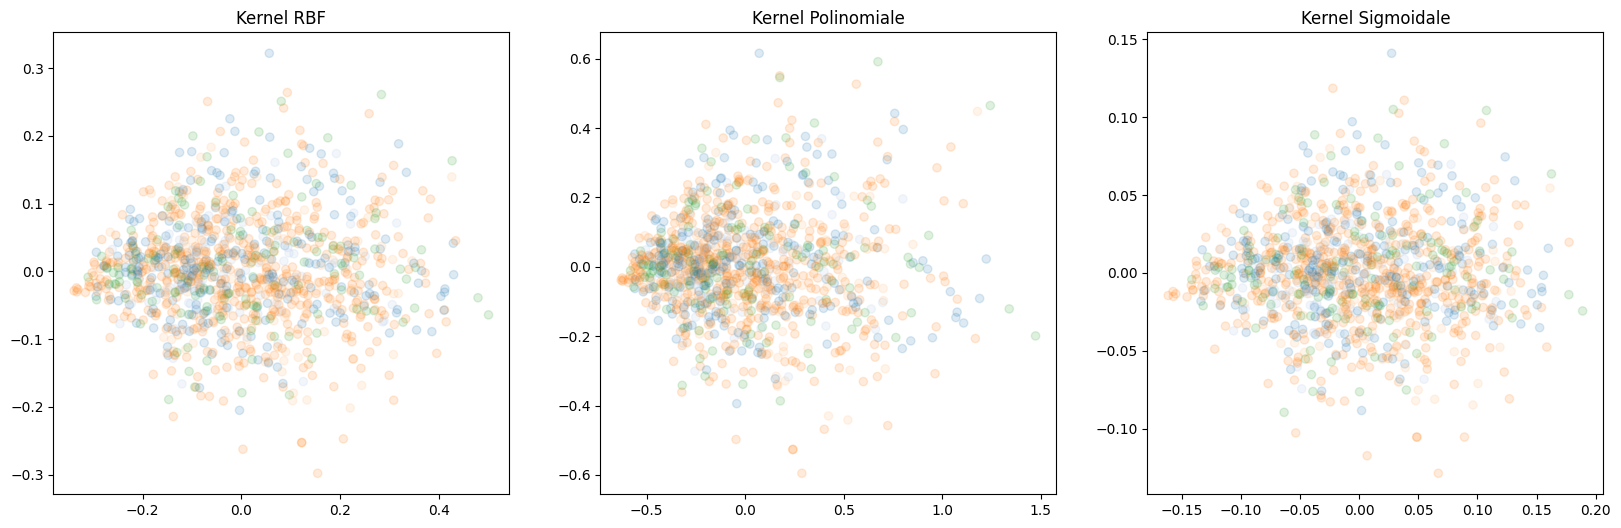

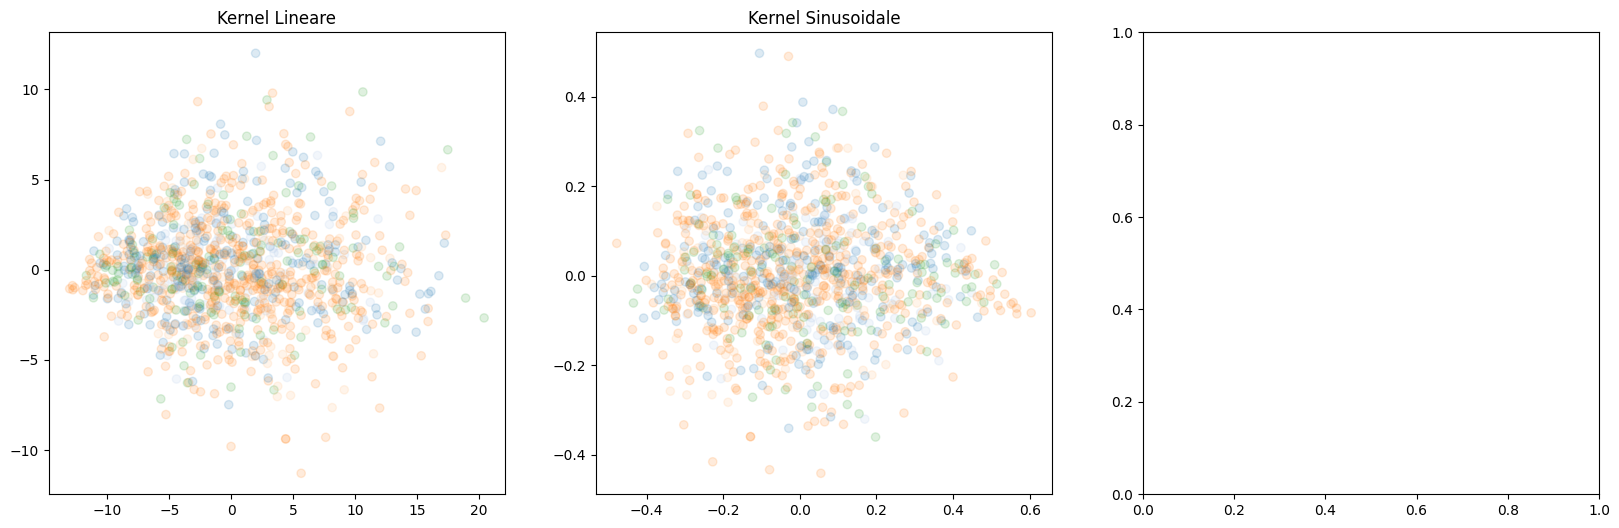

In [5]:
class_colors = [plt.cm.tab20.colors[c] for c in face_targets]

fig1, axs1 = plt.subplots(1, 3, figsize=(20, 6))

axs1[0].scatter(face_k1[:, 0], face_k1[:, 1], c=class_colors, alpha=0.15)
axs1[0].set_title('Kernel RBF')

axs1[1].scatter(face_k2[:, 0], face_k2[:, 1], c=class_colors, alpha=0.15)
axs1[1].set_title('Kernel Polinomiale')

axs1[2].scatter(face_k3[:, 0], face_k3[:, 1], c=class_colors, alpha=0.15)
axs1[2].set_title('Kernel Sigmoidale')

fig2, axs2 = plt.subplots(1, 3, figsize=(20, 6))

axs2[0].scatter(face_k4[:, 0], face_k4[:, 1], c=class_colors, alpha=0.15)
axs2[0].set_title('Kernel Lineare')

axs2[1].scatter(face_k5[:, 0], face_k5[:, 1], c=class_colors, alpha=0.15)
axs2[1].set_title('Kernel Sinusoidale')

plt.show()

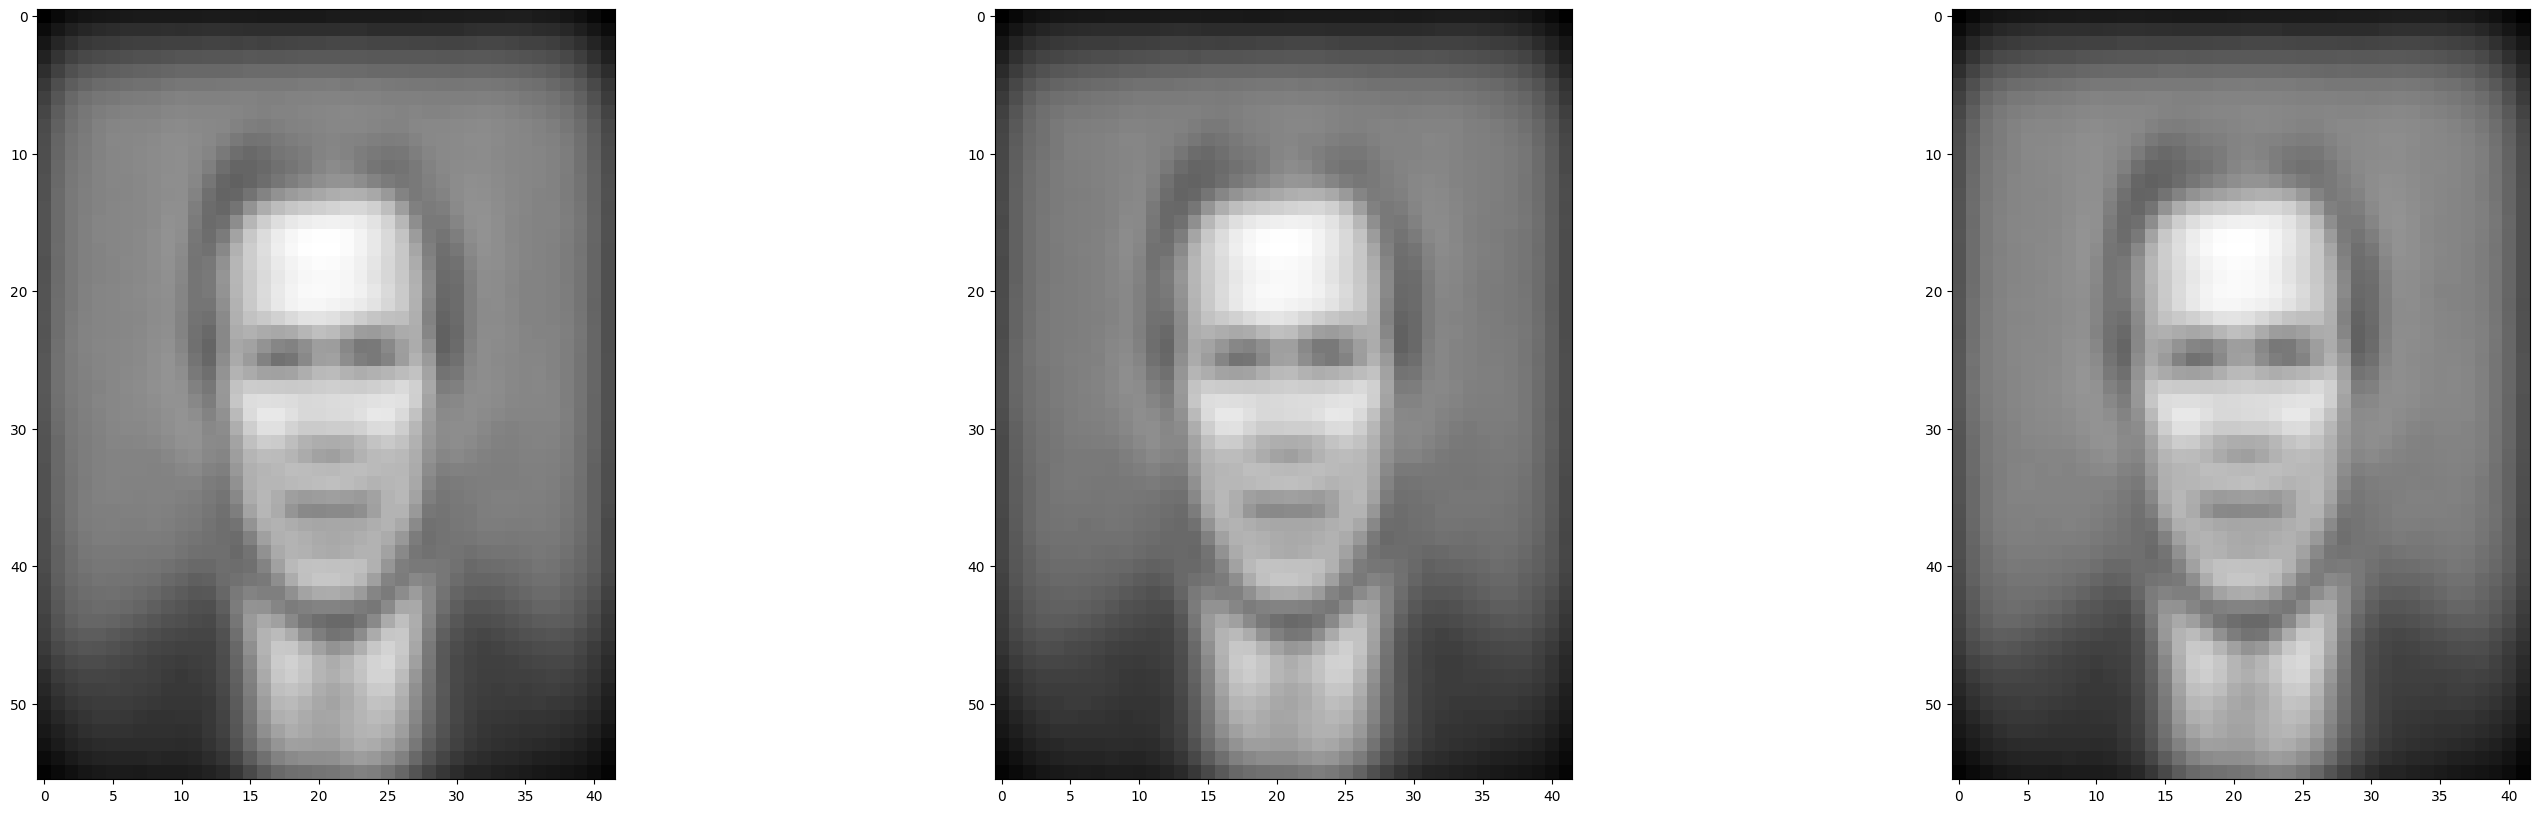

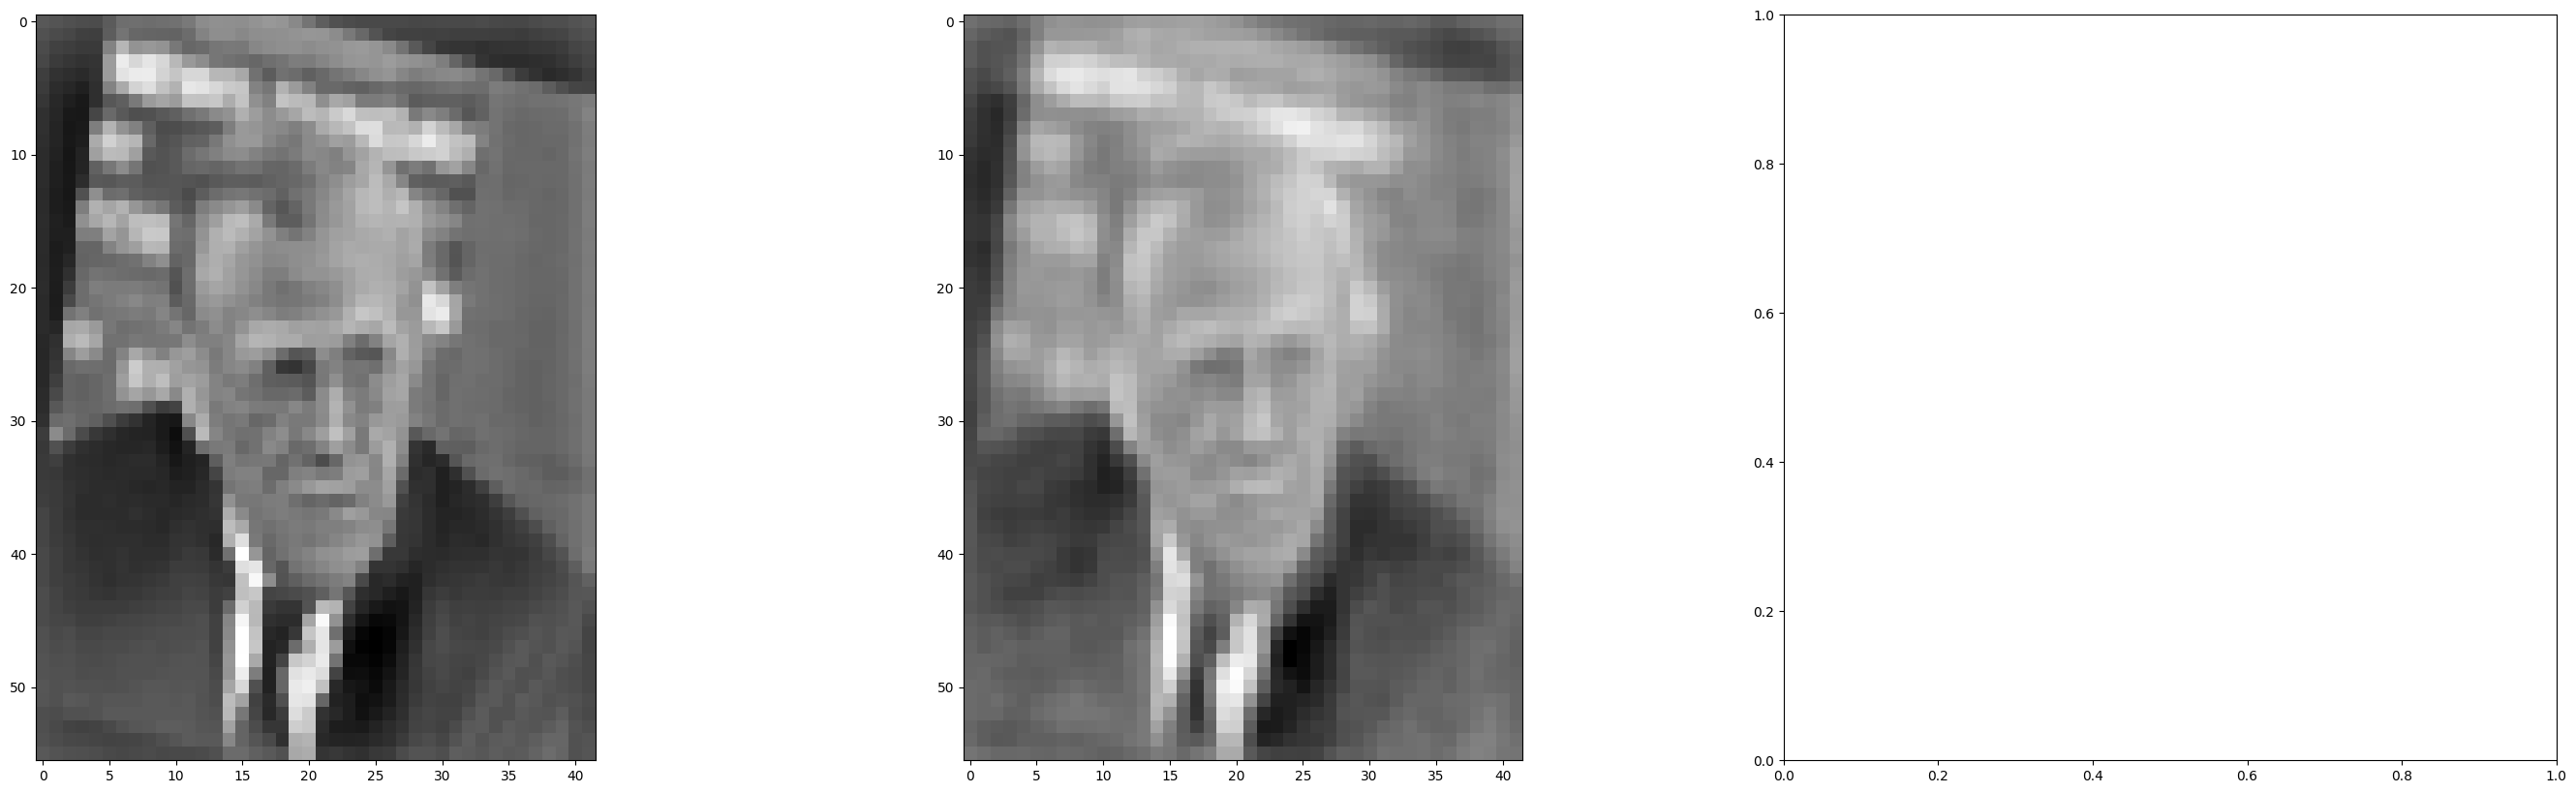

In [6]:

n = 40
face = face_data[n].reshape(1, -1)

fk1 = kpca1.transform(face)
fk1 = kpca1.inverse_transform(fk1)

fk2 = kpca2.transform(face)
fk2 = kpca2.inverse_transform(fk2)

fk3 = kpca3.transform(face)
fk3 = kpca3.inverse_transform(fk3)

fk4 = kpca4.transform(face)
fk4 = kpca4.inverse_transform(fk4)

fk5 = kpca5.transform(face)
fk5 = kpca5.inverse_transform(fk5)

face = face.reshape(height, width)
fk1 = fk1.reshape(height, width)
fk2 = fk2.reshape(height, width)
fk3 = fk3.reshape(height, width)
fk4 = fk4.reshape(height, width)
fk5 = fk5.reshape(height, width)

fig1, axs1 = plt.subplots(1, 3, figsize=(35, 10))
axs1[0].imshow(fk1, cmap=plt.cm.gray)
axs1[1].imshow(fk2, cmap=plt.cm.gray)
axs1[2].imshow(fk3, cmap=plt.cm.gray)

fig2, axs2 = plt.subplots(1, 3, figsize=(35, 10))
axs2[0].imshow(fk4, cmap=plt.cm.gray)
axs2[1].imshow(fk5, cmap=plt.cm.gray)


# Analisi Del Dataset
### Separazione in training e test sets

In [7]:
random_state = 19990704

test_p = 0.3
#val_p = 0.25  # Percentuale di dati di X_trainval da usare come validation set

X_trainval, X_test, y_trainval, y_test, _, img_test = train_test_split(face_data, face_targets, face_images, test_size=test_p, random_state=random_state, shuffle=True)

### Oversampling

In [8]:
ros = RandomOverSampler(random_state= random_state)

### PCA

In [9]:
kpca1 = KernelPCA(n_components= n_comp_fda, kernel='rbf', random_state=randomstate)
kpca2 = KernelPCA(n_components= n_comp_fda, kernel='poly', degree=3, random_state=randomstate)
kpca3 = KernelPCA(n_components= n_comp_fda, kernel='poly', degree=3, coef0=0.5, random_state=randomstate)
kpca4 = KernelPCA(n_components= n_comp_fda, kernel='linear', random_state=randomstate)
kpca5 = KernelPCA(n_components= n_comp_fda, kernel='cosine', random_state=randomstate)

In [10]:
X_train_k1 = kpca1.fit_transform(X_trainval) #rbf
X_train_k2 = kpca2.fit_transform(X_trainval) #poly
X_train_k3 = kpca3.fit_transform(X_trainval) #sigm
X_train_k4 = kpca4.fit_transform(X_trainval) #linear
X_train_k5 = kpca5.fit_transform(X_trainval) #cosin

### FDA

In [11]:
n_components_fda = face_tnames.shape[0]-1

fda1 = FisherDiscriminantAnalysis(n_components_fda)
fda2 = FisherDiscriminantAnalysis(n_components_fda)
fda3 = FisherDiscriminantAnalysis(n_components_fda)
fda4 = FisherDiscriminantAnalysis(n_components_fda)
fda5 = FisherDiscriminantAnalysis(n_components_fda)

face_f1 = fda1.fit_transform(X_train_k1, y_trainval)
face_f2 = fda2.fit_transform(X_train_k2, y_trainval)
face_f3 = fda3.fit_transform(X_train_k3, y_trainval)
face_f4 = fda4.fit_transform(X_train_k4, y_trainval)
face_f5 = fda5.fit_transform(X_train_k5, y_trainval)

## Prediction Test FDA

In [12]:
#Valutazione del dataset usato per il training
y_p_t1 = fda1.evaluate(X_train_k1)
y_p_t2 = fda2.evaluate(X_train_k2)
y_p_t3 = fda3.evaluate(X_train_k3)
y_p_t4 = fda4.evaluate(X_train_k4)
y_p_t5 = fda5.evaluate(X_train_k5)

#Trasformazione del Test set
X_test_k1 = kpca1.transform(X_test)
X_test_k2 = kpca2.transform(X_test)
X_test_k3 = kpca3.transform(X_test)
X_test_k4 = kpca4.transform(X_test)
X_test_k5 = kpca5.transform(X_test)

#Valutazione del Test set
y_p1 = fda1.evaluate(X_test_k1)
y_p2 = fda2.evaluate(X_test_k2)
y_p3 = fda3.evaluate(X_test_k3)
y_p4 = fda4.evaluate(X_test_k4)
y_p5 = fda5.evaluate(X_test_k5)

### Scoring

In [13]:
p_t1 = precision_score(y_trainval, y_p_t1, average='weighted', zero_division=0)
r_t1 = recall_score(y_trainval, y_p_t1, average='weighted')
f1_t1 = f1_score(y_trainval, y_p_t1, average='weighted')

p_1 = precision_score(y_test, y_p1, average='weighted', zero_division=0)
r_1 = recall_score(y_test, y_p1, average='weighted')
f1_1 = f1_score(y_test, y_p1, average='weighted')

df_p1 = pd.DataFrame({ 'Precision': [p_t1, p_1], 
                        'Recall': [r_t1, r_1],
                        'F1': [f1_t1, f1_1]
                       },
                      index=['Training Set', 'Test Set'])

p_t2 = precision_score(y_trainval, y_p_t2, average='weighted', zero_division=0)
r_t2 = recall_score(y_trainval, y_p_t2, average='weighted')
f1_t2 = f1_score(y_trainval, y_p_t2, average='weighted')

p_2 = precision_score(y_test, y_p2, average='weighted', zero_division=0)
r_2 = recall_score(y_test, y_p2, average='weighted')
f1_2 = f1_score(y_test, y_p2, average='weighted')

df_p2 = pd.DataFrame({ 'Precision': [p_t2, p_2], 
                        'Recall': [r_t2, r_2],
                        'F1': [f1_t2, f1_2]
                       },
                      index=['Training Set', 'Test Set'])

p_t3 = precision_score(y_trainval, y_p_t3, average='weighted', zero_division=0)
r_t3 = recall_score(y_trainval, y_p_t3, average='weighted')
f1_t3 = f1_score(y_trainval, y_p_t3, average='weighted')

p_3 = precision_score(y_test, y_p3, average='weighted', zero_division=0)
r_3 = recall_score(y_test, y_p3, average='weighted')
f1_3 = f1_score(y_test, y_p3, average='weighted')

df_p3 = pd.DataFrame({ 'Precision': [p_t3, p_3], 
                        'Recall': [r_t3, r_3],
                        'F1': [f1_t3, f1_3]
                       },
                      index=['Training Set', 'Test Set'])

p_t4 = precision_score(y_trainval, y_p_t4, average='weighted', zero_division=0)
r_t4 = recall_score(y_trainval, y_p_t4, average='weighted')
f1_t4 = f1_score(y_trainval, y_p_t4, average='weighted')

p_4 = precision_score(y_test, y_p4, average='weighted', zero_division=0)
r_4 = recall_score(y_test, y_p4, average='weighted')
f1_4 = f1_score(y_test, y_p4, average='weighted')

df_p4 = pd.DataFrame({ 'Precision': [p_t4, p_4], 
                        'Recall': [r_t4, r_4],
                        'F1': [f1_t4, f1_4]
                       },
                      index=['Training Set', 'Test Set'])

p_t5 = precision_score(y_trainval, y_p_t5, average='weighted', zero_division=0)
r_t5 = recall_score(y_trainval, y_p_t5, average='weighted')
f1_t5 = f1_score(y_trainval, y_p_t5, average='weighted')

p_5 = precision_score(y_test, y_p5, average='weighted', zero_division=0)
r_5 = recall_score(y_test, y_p5, average='weighted')
f1_5 = f1_score(y_test, y_p5, average='weighted')

df_p5 = pd.DataFrame({ 'Precision': [p_t5, p_5], 
                        'Recall': [r_t5, r_5],
                        'F1': [f1_t5, f1_5]
                       },
                      index=['Training Set', 'Test Set'])

display('RBF',df_p1,'Poly 3', df_p2, 'Poly 6', df_p3,'Linear', df_p4,'Cosin', df_p5)


'RBF'

,Precision,Recall,F1
Training Set,1.000000,1.000000,1.000000
Test Set,0.770315,0.760234,0.758365


'Poly 3'

,Precision,Recall,F1
Training Set,1.000000,1.000000,1.000000
Test Set,0.719869,0.707602,0.711712


'Poly 6'

,Precision,Recall,F1
Training Set,1.000000,1.000000,1.000000
Test Set,0.772741,0.769006,0.768264


'Linear'

,Precision,Recall,F1
Training Set,1.000000,1.000000,1.000000
Test Set,0.607472,0.578947,0.590083


'Cosin'

,Precision,Recall,F1
Training Set,1.000000,1.000000,1.000000
Test Set,0.617076,0.546784,0.568769
